# Business Objective:
## To forecast CO2 levels for an organization so that the organization can follow government norms with respect to CO2 emission levels


In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from scipy import stats
from matplotlib import pylab
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("D:\pyt\Project CO2\CO2 dataset.xlsx")
df.tail()

,Year,CO2
210,2010,15.6
211,2011,15.6
212,2012,14.8
213,2013,14.7
214,2014,15.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


In [4]:
df.describe()

,Year,CO2
count,215.000000,215.000000
mean,1907.000000,6.741970
std,62.209324,6.522437
min,1800.000000,0.001750
25%,1853.500000,0.041050
50%,1907.000000,6.390000
75%,1960.500000,11.500000
max,2014.000000,18.200000


<AxesSubplot:ylabel='CO2'>

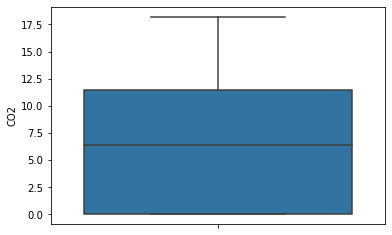

In [5]:
sns.boxplot(y= df['CO2'])

In [6]:
# Lets create the copy of the data-frame
df1= df.copy()
df1.set_index("Year", inplace=True)
df1.head()

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542


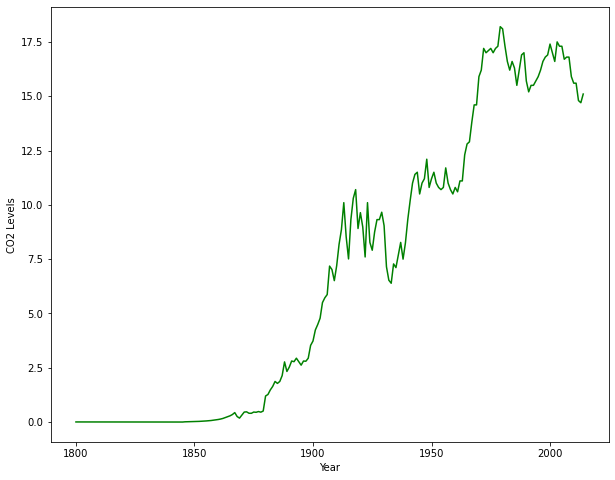

In [7]:
# Lets try to see the variation in CO2 levels with respect to year
plt.figure(figsize=(10,8))
plt.plot(df1, color= "green")
plt.xlabel("Year")
plt.ylabel("CO2 Levels")
plt.show()

<AxesSubplot:ylabel='Count'>

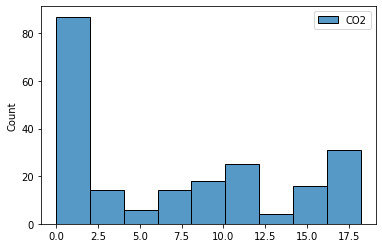

In [8]:
# Lets check for the type of the distribution of the data
sns.histplot(df1)

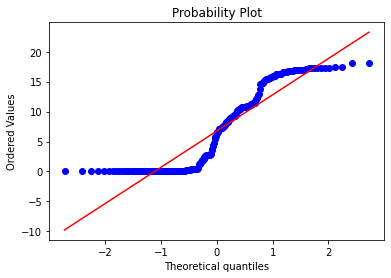

In [9]:
# Lets plot the Q-Q plot to see the type of distribution
stats.probplot(df1["CO2"],plot =pylab)
plt.show()

<AxesSubplot:xlabel='CO2', ylabel='Density'>

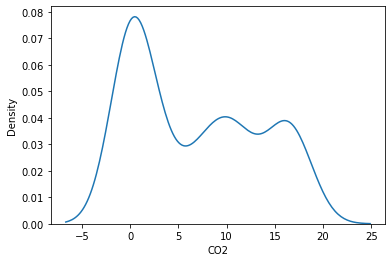

In [10]:
sns.kdeplot(df1["CO2"])

In [11]:
# from above graphs, we can analyze that data points are not following the normal distribution

### Using various transformation techniques to make data follow the Gaussian Distribution

In [12]:
# Making new data-frame with different types of transformation(square, sq.root, log, reciprocal, exp)
transformation = df1.transform([np.square, np.sqrt,  np.log, np.reciprocal, np.exp])

In [13]:
transformation.columns = ['square', "sqrt", "log","reciprocal", "exp"]

In [14]:
transformation.head()

,square,sqrt,log,reciprocal,exp
Year,,,,,
1800,0.000032,0.075366,-5.170804,176.056338,1.005696
1801,0.000031,0.074900,-5.183205,178.253119,1.005626
1802,0.000031,0.074498,-5.193957,180.180180,1.005565
1803,0.000030,0.074027,-5.206650,182.481752,1.005495
1804,0.000029,0.073621,-5.217659,184.501845,1.005435


In [15]:
# lets create the fuction to visualize features:
def fig_plot(data):
    plt.figure(figsize=(12,10))
    plt.subplot(3, 1, 1)
    data.hist()

    plt.subplot(3, 1, 2)
    stats.probplot(data,plot =pylab)
    
    plt.subplot(3, 1, 3)
    sns.kdeplot(data)
    plt.show()

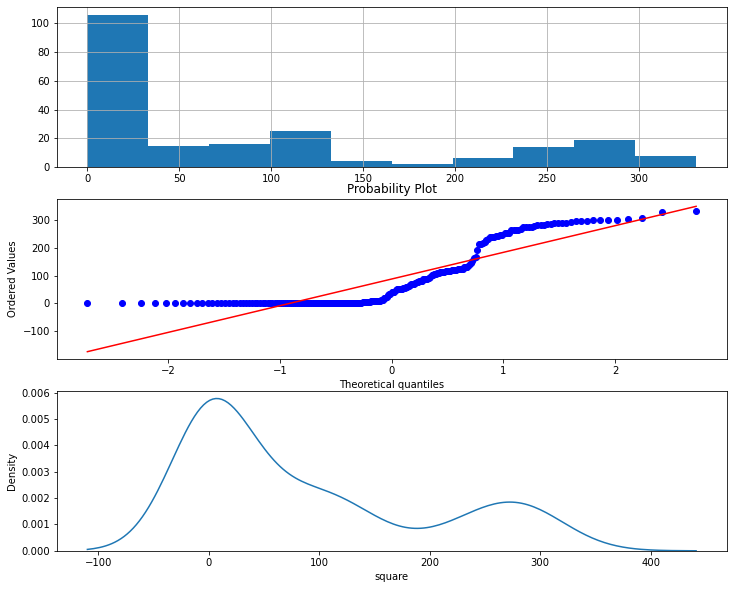

In [16]:
# for square transformation
fig_plot(transformation["square"])

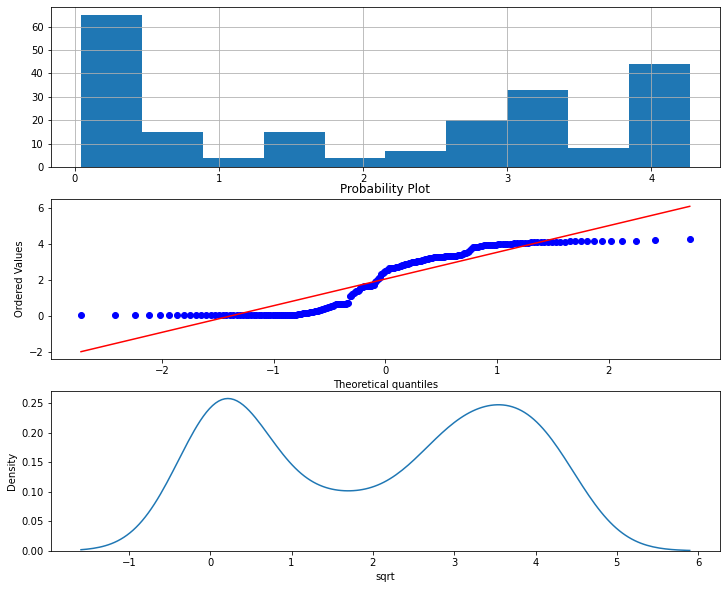

In [17]:
# for square root transformation
fig_plot(transformation["sqrt"])

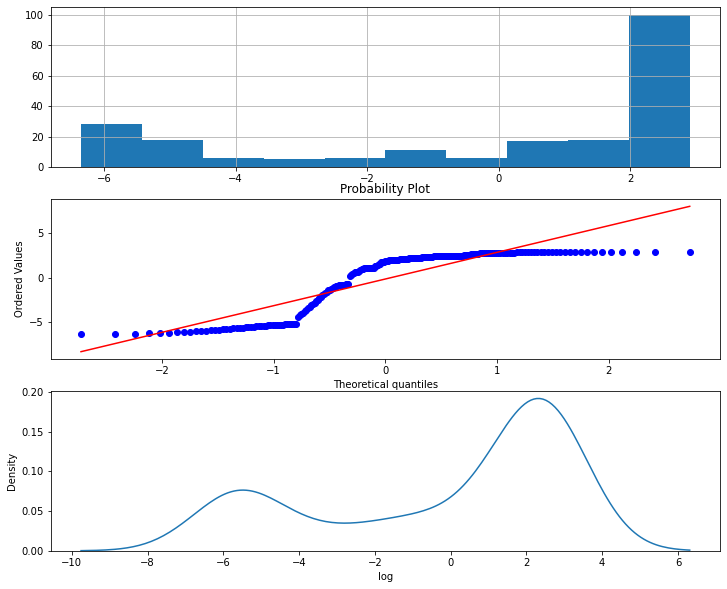

In [18]:
# for log transformation
fig_plot(transformation["log"])

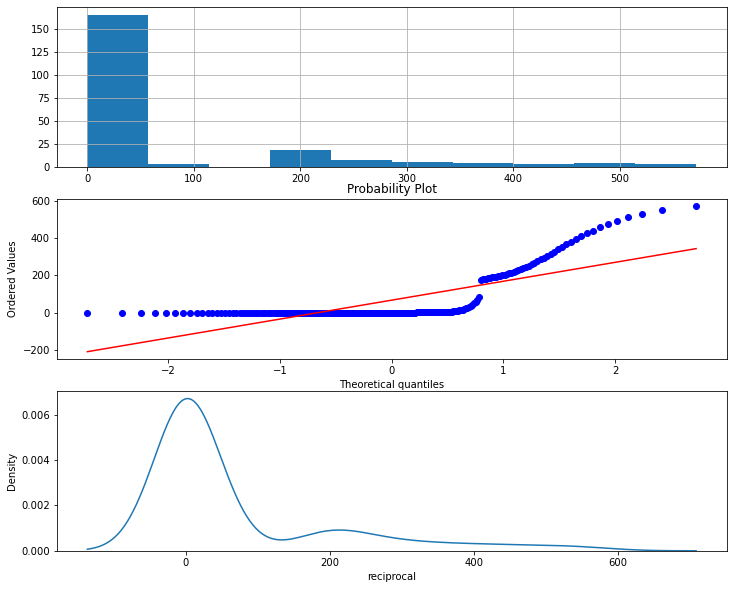

In [19]:
# for reciprocal transformation
fig_plot(transformation["reciprocal"])

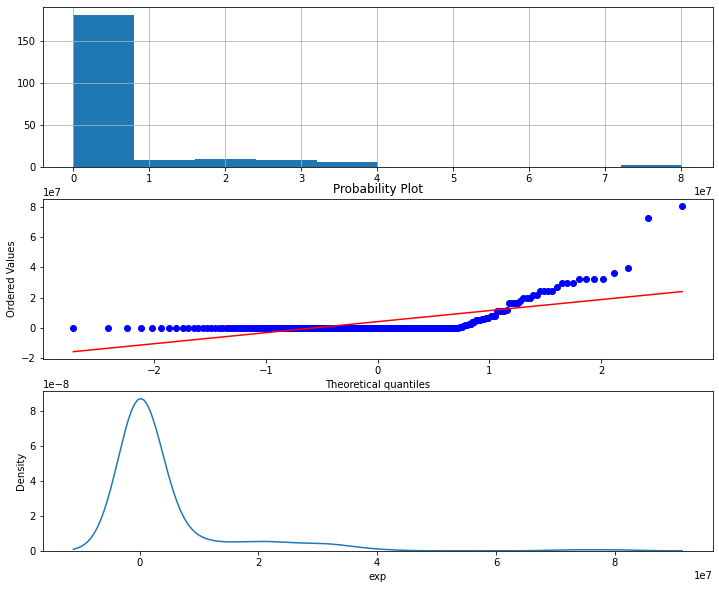

In [20]:
# for exp transformation
fig_plot(transformation["exp"])

In [21]:
# Lets use boxcox transformation
from scipy.stats import boxcox , yeojohnson
bcx_target, lam= boxcox(df1["CO2"])
bcx_target = pd.DataFrame(bcx_target, columns=["trans"])

In [22]:
bcx_target.head()

,trans
0,-3.094412
1,-3.098401
2,-3.101852
3,-3.105915
4,-3.109430


In [23]:
lam

0.21904684941499802

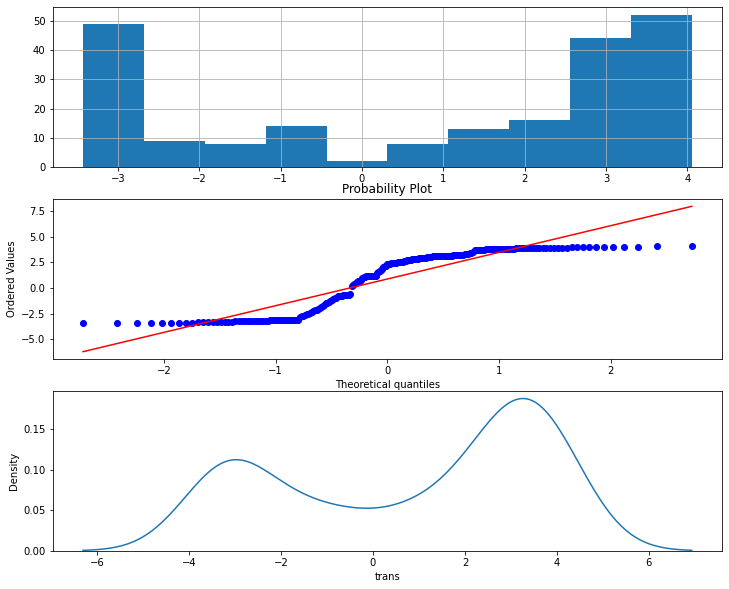

In [24]:
fig_plot(bcx_target["trans"])

In [25]:
yeo_target, lam1 =yeojohnson(df1["CO2"])
yeo_target = pd.DataFrame(yeo_target, columns=["trans"])
yeo_target.head()

,trans
0,0.005667
1,0.005597
2,0.005537
3,0.005467
4,0.005408


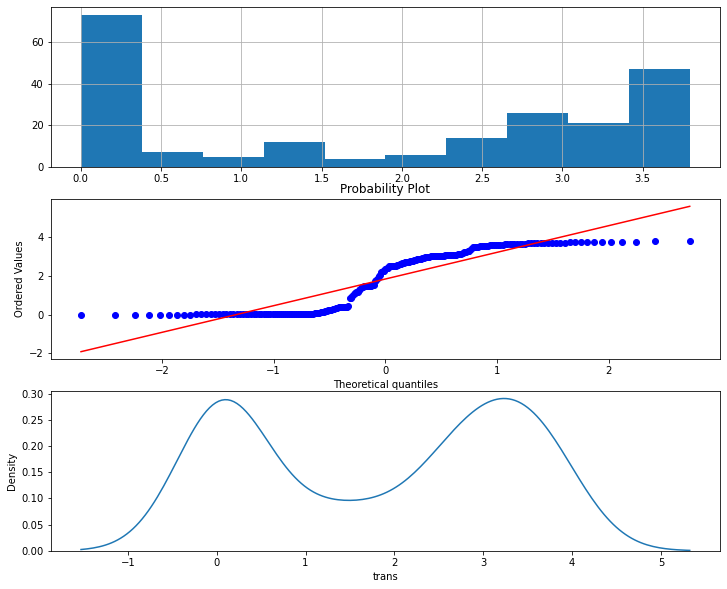

In [26]:
fig_plot(yeo_target["trans"])

## It can be seen that, after making transformations also, the data is not having normal distribution

# Smoothing of time series 

In [27]:
# Rolling Average(Moving average method)
rolling = df1.rolling(window=12).mean()

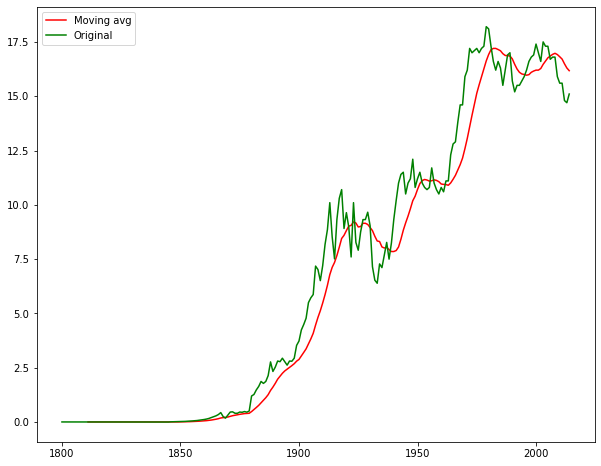

In [28]:
plt.figure(figsize=(10,8))
plt.plot(rolling.dropna(), color = "red", label = "Moving avg")
plt.plot(df1, color= "green", label=  "Original")
plt.legend()

In [29]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [30]:
# Simple Exponential Smoothing
simp_fit = SimpleExpSmoothing(df1).fit(smoothing_level=0.2)

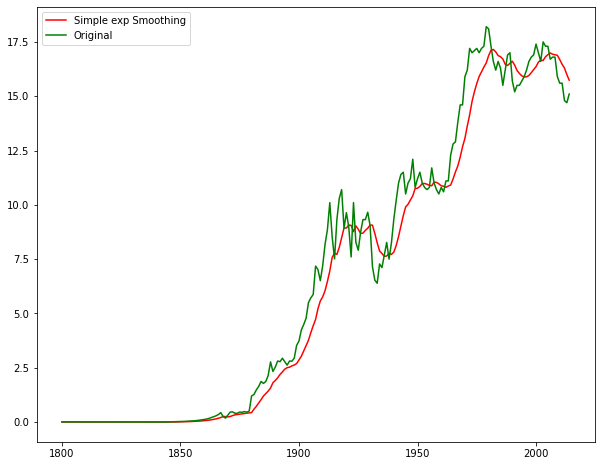

In [31]:
plt.figure(figsize=(10,8))
plt.plot(simp_fit.fittedvalues, color = "red", label = "Simple exp Smoothing")
plt.plot(df1, color= "green", label=  "Original")
plt.legend()

In [32]:
# Holt smoothing
holt_smooth = Holt(df1).fit()     # Linear Trend

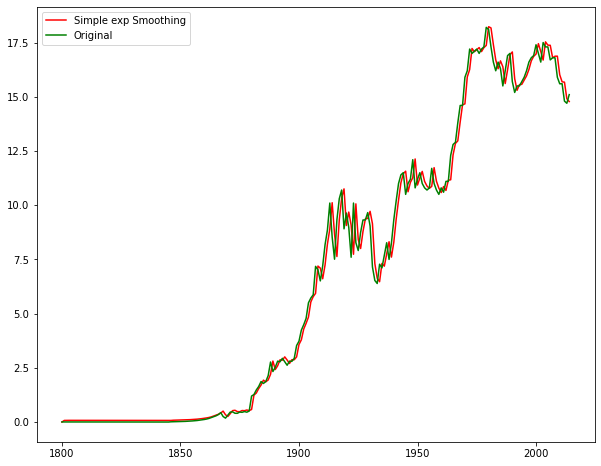

In [33]:
plt.figure(figsize=(10,8))
plt.plot(holt_smooth.fittedvalues,color = "red", label = "Simple exp Smoothing")
plt.plot(df1, color= "green", label=  "Original")
plt.legend()

In [34]:
# Holt smoothing
holt_exp = Holt(df1, exponential=True).fit()  # Exponential trend

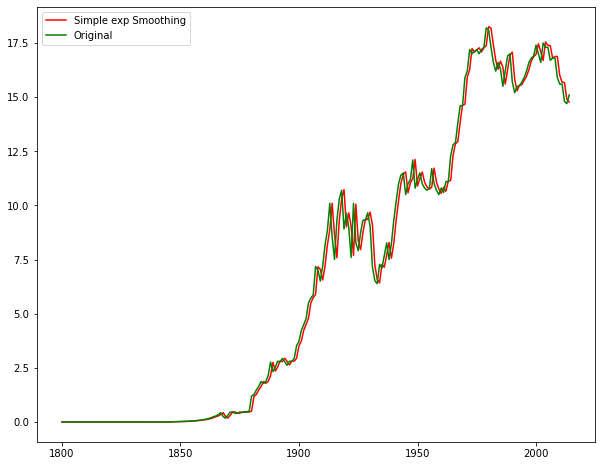

In [35]:
plt.figure(figsize=(10,8))
plt.plot(holt_exp.fittedvalues,color = "red", label = "Simple exp Smoothing")
plt.plot(df1, color= "green", label=  "Original")
plt.legend()

#  checking the Stationarity of the series

In [36]:
df2 = df.copy()
df2.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [37]:
df2.set_index("Year", inplace= True)
df2.head()

,CO2
Year,
1800,0.00568
1801,0.00561
1802,0.00555
1803,0.00548
1804,0.00542


In [38]:
# lets use the Augments Dickey Fuller test to check the Stationarity by using the function
from statsmodels.tsa.stattools import adfuller
def adfuller_test(data):
    print('Results of Dickey Fuller Test:')
    result = adfuller(data, autolag='AIC')
    label=['Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, label):
        print(f"{label} :- {value}")

In [39]:
adfuller_test(df2) # from p value above we can see that series is not Stationary 

Results of Dickey Fuller Test:
Test Statistic :- -0.37846277515588705
p-value :- 0.9136330950336237
#Lags Used :- 0
Number of Observations Used :- 214


In [40]:
#Test whether Timeseries is Stationary or not
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

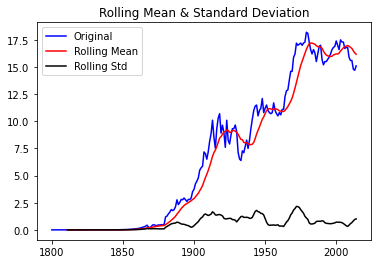

In [41]:
test_stationarity(df2)

In [42]:
# lets take first difference to make the data stationary

In [43]:
df2["first_diff"]= df2 - df2.shift(1)
df2.head()

,CO2,first_diff
Year,,
1800,0.00568,NaN
1801,0.00561,-0.00007
1802,0.00555,-0.00006
1803,0.00548,-0.00007
1804,0.00542,-0.00006


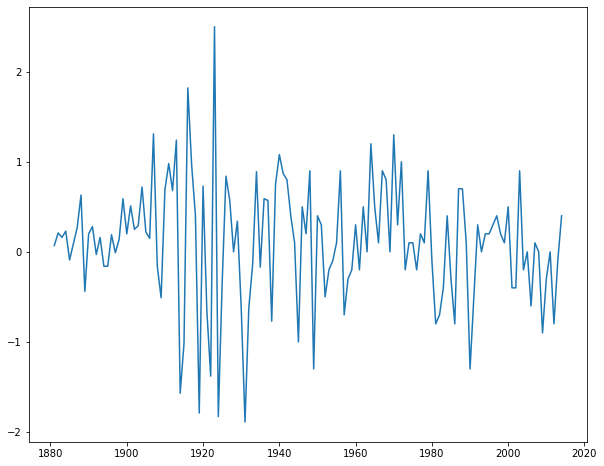

In [44]:
plt.figure(figsize=(10,8))
plt.plot(df2.first_diff.dropna().iloc[80:])

In [45]:
adfuller_test(df2.first_diff.dropna())

Results of Dickey Fuller Test:
Test Statistic :- -3.7800045305842516
p-value :- 0.003118649594242027
#Lags Used :- 15
Number of Observations Used :- 198


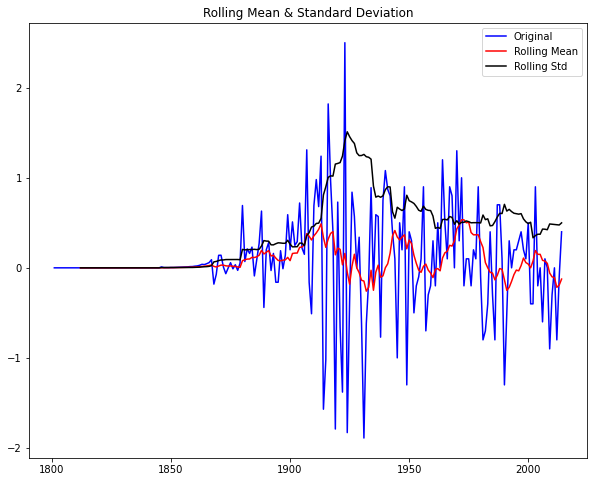

In [46]:
plt.figure(figsize=(10,8))
test_stationarity(df2.first_diff.dropna())

In [47]:
diff_data = list(df2.first_diff.dropna())
data =list(df2.CO2)

In [207]:
diff_data

[-6.999999999999975e-05,
 -6.000000000000016e-05,
 -7.000000000000062e-05,
 -5.999999999999929e-05,
 -6.000000000000016e-05,
 -6.999999999999975e-05,
 -6.000000000000016e-05,
 -6.000000000000016e-05,
 -6.000000000000016e-05,
 -6.999999999999975e-05,
 -7.000000000000062e-05,
 -6.999999999999975e-05,
 -6.999999999999975e-05,
 -8.000000000000021e-05,
 -8.99999999999998e-05,
 -8.99999999999998e-05,
 -0.00010000000000000026,
 -8.99999999999998e-05,
 -0.00010999999999999985,
 -0.00010000000000000026,
 -0.00010999999999999985,
 -0.00010999999999999985,
 -0.00011000000000000029,
 -0.00011000000000000029,
 -0.00010999999999999985,
 -0.00011999999999999988,
 -0.00011000000000000029,
 -0.00011999999999999988,
 -0.00010999999999999985,
 -0.00010999999999999985,
 -0.00011000000000000029,
 -0.00010999999999999985,
 -0.00010000000000000026,
 -9.999999999999983e-05,
 -9.999999999999983e-05,
 -9.000000000000024e-05,
 -8.99999999999998e-05,
 -8.000000000000021e-05,
 -8.99999999999998e-05,
 -8.0000000000

In [215]:
train_df= diff_data[: 170]
test_df = diff_data[170 :]

In [221]:
test_df

[0.29999999999999893,
 1.0,
 -0.1999999999999993,
 0.10000000000000142,
 0.09999999999999787,
 -0.1999999999999993,
 0.1999999999999993,
 0.10000000000000142,
 0.8999999999999986,
 -0.09999999999999787,
 -0.8000000000000007,
 -0.6999999999999993,
 -0.40000000000000213,
 0.40000000000000213,
 -0.3000000000000007,
 -0.8000000000000007,
 0.6999999999999993,
 0.6999999999999993,
 0.10000000000000142,
 -1.3000000000000007,
 -0.5,
 0.3000000000000007,
 0.0,
 0.1999999999999993,
 0.20000000000000107,
 0.29999999999999893,
 0.40000000000000213,
 0.1999999999999993,
 0.09999999999999787,
 0.5,
 -0.3999999999999986,
 -0.3999999999999986,
 0.8999999999999986,
 -0.1999999999999993,
 0.0,
 -0.6000000000000014,
 0.10000000000000142,
 0.0,
 -0.9000000000000004,
 -0.3000000000000007,
 0.0,
 -0.7999999999999989,
 -0.10000000000000142,
 0.40000000000000036]

In [249]:
df2.loc[1970]

CO2           15.9
first_diff     1.3
Name: 1970, dtype: float64

In [250]:
test = df2[171:]
test.head()

,CO2,first_diff
Year,,
1971,16.2,0.3
1972,17.2,1.0
1973,17.0,-0.2
1974,17.1,0.1
1975,17.2,0.1


In [251]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [252]:
# from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [265]:
# Using Simple Exponential Smoothing
model_se = SimpleExpSmoothing(train_df).fit(optimized=True)

In [266]:
forecast_se = model_se.forecast(44)

In [267]:
forecast_se

array([0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599])

In [268]:
act= [15.9]
for i in range(len(forecast_se)):
    summ= (act[i]+forecast_se[i])
    act.append(summ)
act.remove(15.9)

In [269]:
act_pred= pd.Series(act).set_axis(df2.index[171:])

In [270]:
act_pred.head(5)

Year
1971    15.993496
1972    16.086992
1973    16.180488
1974    16.273984
1975    16.367480
dtype: float64

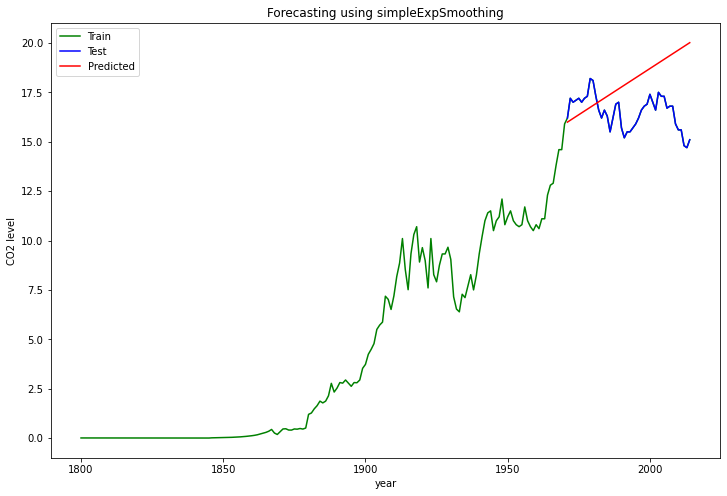

In [271]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Train')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(act_pred, color='Red', label='Predicted')
plt.title("Forecasting using simpleExpSmoothing")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [272]:
rmse_se = np.sqrt(mean_squared_error(test.CO2,act_pred))
mape_se = mean_absolute_percentage_error(test.CO2,act_pred)*100

print(rmse_se)
print(mape_se)

2.2793966631159766
11.802031153391876


In [391]:
# Using Holt Winter's Exponential Smoothing
model_hw= ExponentialSmoothing(train_df, 
                              initialization_method="heuristic", use_boxcox=False).fit()

In [392]:
forecast_hw= model_hw.forecast(44)
forecast_hw

array([0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599, 0.09349599,
       0.09349599, 0.09349599, 0.09349599, 0.09349599])

In [393]:
forecast_act = [15.9]
for i in range(len(forecast_hw)):
    summ= (forecast_act[i]+forecast_hw[i])
    forecast_act.append(summ)

forecast_act.remove(15.9)

In [394]:
forecast_act= pd.Series(forecast_act).set_axis(df2.index[171:])

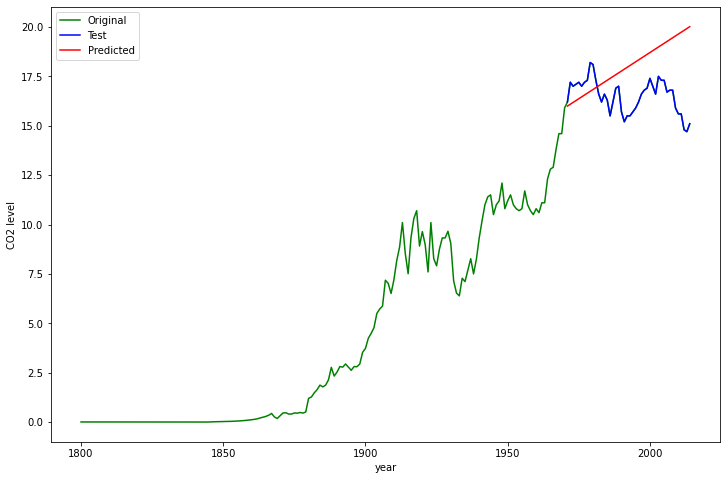

In [395]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Original')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(forecast_act, color='Red', label='Predicted')
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [396]:
rmse_hw = np.sqrt(mean_squared_error(test.CO2 ,forecast_act))
rmse_hw

2.2793966266021446

In [397]:
mape_hw = mean_absolute_percentage_error(test.CO2 ,forecast_act)*100
mape_hw

11.802030964375918

# Autoregression Model

In [67]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

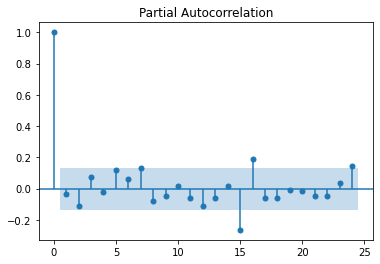

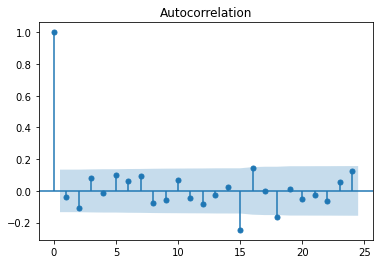

In [68]:
plot_pacf(df2.first_diff.dropna())
plot_acf(df2.first_diff.dropna())
plt.show()

In [364]:
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(train_df, trend="n", lags=15).fit()

In [365]:
pred_ar= model_ar.predict(start=171, end = 214)
pred_ar

array([ 0.19556535,  0.38560183,  0.27617346,  0.11797096,  0.13616999,
        0.02943915,  0.15217635, -0.21759714,  0.05298186,  0.09099908,
       -0.20114769, -0.12663936,  0.17619618, -0.4180615 ,  0.04493849,
        0.03749556, -0.15277753, -0.0744585 , -0.03744285, -0.04930992,
       -0.04745912, -0.05705401,  0.07307557, -0.08141635, -0.05536282,
        0.06666844,  0.01155535, -0.10747241,  0.13197953, -0.01535874,
       -0.05941955,  0.06195337,  0.01609916, -0.01076339,  0.01354258,
        0.02558626,  0.01396528, -0.04040925,  0.04467113,  0.02233701,
       -0.03335646,  0.00571893,  0.04679208, -0.04762347])

In [366]:
forecast_AR = [15.9]
for i in range(len(pred_ar)):
    summ= (forecast_AR[i]+pred_ar[i])
    forecast_AR.append(summ)

forecast_AR.remove(15.9)

In [367]:
forecast_AR= pd.Series(forecast_AR).set_axis(df2.index[171:])

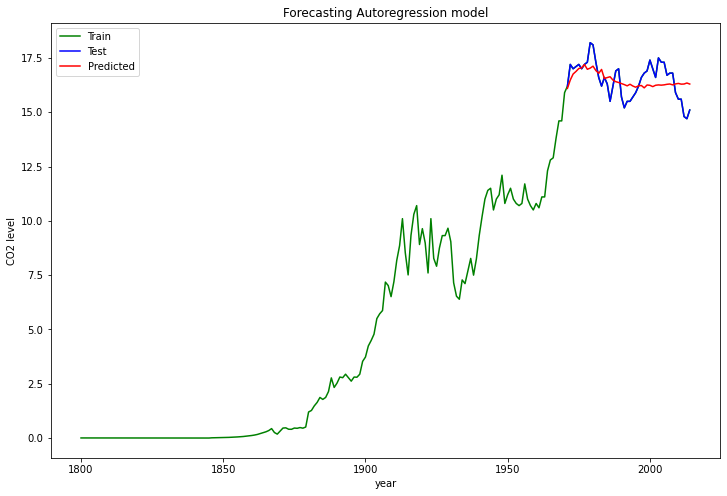

In [371]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Train')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(forecast_AR, color='Red', label='Predicted')
plt.title("Forecasting Autoregression model")
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [372]:
rmse_ar = np.sqrt(mean_squared_error(test.CO2 ,forecast_AR))
rmse_ar

0.7406366529728764

In [373]:
mape_Ar = mean_absolute_percentage_error(test.CO2 ,forecast_AR)*100
mape_Ar

3.788231245544355

In [374]:
# Define the p, d and q parameters to take any value between 0 and 5

import itertools
p = range(0, 5)
d = range(0, 5)
q = range(0, 5)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

In [375]:
from statsmodels.tsa.arima.model import ARIMA

for para in pdq:
    try:
        model_arima= ARIMA(train_df, order = para).fit()
        forecast_arima =  model_arima.predict(start = 171, end = 214)
        aic= model_arima.aic
        rsme= np.sqrt(mean_squared_error(test_df,forecast_arima))
        print(para, rsme, aic)
    except:
        continue


(0, 0, 0) 0.515094236220908 287.0015932774259
(0, 0, 1) 0.5149453853391552 287.46796043010767
(0, 0, 2) 0.5164030484073135 287.974254521464
(0, 0, 3) 0.5120993271755092 287.67641788354115
(0, 0, 4) 0.5117816413037836 289.51832670688106
(0, 1, 0) 1.4108346981324733 412.8516915032337
(0, 1, 1) 0.5314382501003034 290.9760656183668
(0, 1, 2) 0.5371910345587735 291.19851215306
(0, 1, 3) 0.543637378360896 291.3547763981859
(0, 1, 4) 0.5376158976232346 291.2818016420545
(0, 2, 0) 35.93023543256631 593.1045681967598
(0, 2, 1) 1.5890965475424965 418.5329780151176
(0, 2, 2) 0.5714867181581689 302.00963430527577
(0, 2, 3) 0.5713947925840165 302.4350967605447
(0, 2, 4) 0.5761047924114427 302.92271106790406
(0, 3, 0) 1050.3253982906563 786.0312639074456
(0, 3, 1) 39.56095298712168 597.7022059445592
(0, 3, 2) 6.144108442529926 428.761557617368
(0, 3, 3) 0.6066898538151904 322.875931404177
(0, 3, 4) 0.7520058076028093 323.3945807665075
(0, 4, 0) 19248.241415548597 984.6793669653481
(0, 4, 1) 1131.184

In [77]:
test_df = pd.Series(test_df, index=range(0,24))


In [78]:
model_arima= ARIMA(df2.first_diff.dropna(), order = (10,0,18)).fit()

In [79]:
forecast_arima = model_arima.predict(start = 191, end = 214)

In [80]:
forecast_arima=forecast_arima.reset_index(drop=True)

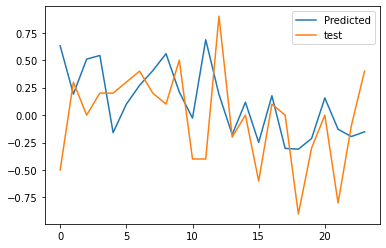

In [81]:
plt.plot(forecast_arima, label = "Predicted")
plt.plot(test_df, label = "test")
plt.legend()

In [82]:
model_arima.aic

344.94103841448424

In [83]:
rsme= np.sqrt(mean_squared_error(test_df,forecast_arima))
rsme

0.4741353997988857

In [84]:
forecast_arima= np.array(forecast_arima)

In [85]:
forecast_ARIMA = [15.7]
for i in range(len(forecast_arima)):
    summ= (forecast_ARIMA[i]+forecast_arima[i])
    forecast_ARIMA.append(summ)

In [86]:
forecast_ARIMA.remove(15.7)

In [87]:
forecast_ARIMA= pd.Series(forecast_ARIMA).set_axis(df2.index[191:])

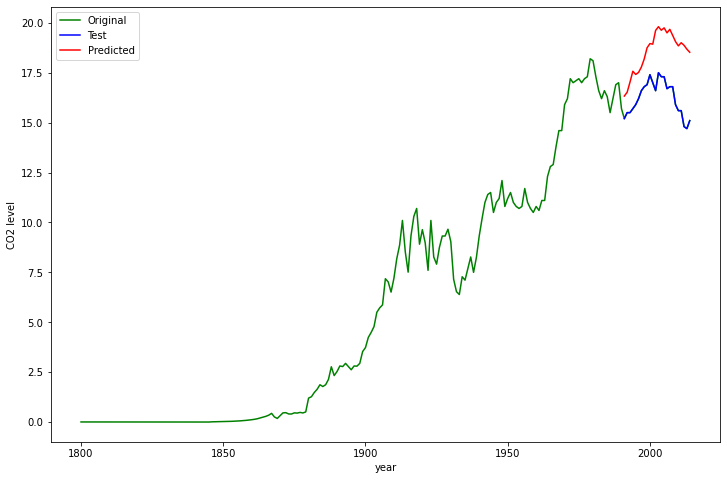

In [88]:
plt.figure(figsize=(12,8))
plt.plot(df2.CO2, color='green', label='Original')
plt.plot(test.CO2, color='blue', label='Test')
plt.plot(forecast_ARIMA, color='Red', label='Predicted')
plt.xlabel("year")
plt.ylabel("CO2 level")
plt.legend()
plt.show()

In [89]:
rmse_arima = np.sqrt(mean_squared_error(test.CO2 ,forecast_ARIMA))
rmse_arima

2.4985332216974645

In [90]:
model_arima.aic

344.94103841448424